###Setting Environment

In [1]:
#imports 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('always') 

from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Loading Data for Training 
(From EDA)

In [2]:
import pickle
filename = ['trainX.sav', 'trainY.sav', 'testX.sav', 'testY.sav']
 
X_train = pickle.load(open(filename[0], 'rb'))
y_train = pickle.load(open(filename[1], 'rb'))
X_test = pickle.load(open(filename[2], 'rb'))
y_test = pickle.load(open(filename[3], 'rb'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: ResourceWarning: unclosed file <_io.BufferedReader name='trainX.sav'>
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: ResourceWarning: unclosed file <_io.BufferedReader name='trainY.sav'>
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: ResourceWarning: unclosed file <_io.BufferedReader name='testX.sav'>
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: ResourceWarning: unclosed file <_io.BufferedReader name='testY.sav'>
  import sys


### Models
Baseline, K-nearest neighbours, Logistic Regression, SVM, Random Forest, Gradient Boosting

In [3]:
seed = 2
acc_results = {}
def train_model(name,model,acc_results):
  m = model.fit(X_train,y_train)
  y_pred = m.predict(X_test)
  
  accuracy = accuracy_score(y_test, y_pred)
  acc_results[name] = accuracy

  print('Classifier: {}'.format(name))
  print('\nReport', classification_report(y_test, y_pred))
  print('\nAccuracy: {}'.format(accuracy))
  #print('\nConfusion matrix:\n', confusion_matrix(y_test,y_pred))
  cf_matrix = confusion_matrix(y_test,y_pred)
  ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt="d")
  ax.set_title('Confusion Matrix');
  ax.set_xlabel('Predicted Values')
  ax.set_ylabel('Actual Values ')
  ax.xaxis.set_ticklabels(['False','True'])
  ax.yaxis.set_ticklabels(['False','True'])
  plt.show()

#### Default Parameters

##### Baseline (Dummy Classifier)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classifier: dummy classifier

Report               precision    recall  f1-score   support

           0       0.49      1.00      0.66      1275
           1       0.00      0.00      0.00      1312

    accuracy                           0.49      2587
   macro avg       0.25      0.50      0.33      2587
weighted avg       0.24      0.49      0.33      2587


Accuracy: 0.49284885968303055


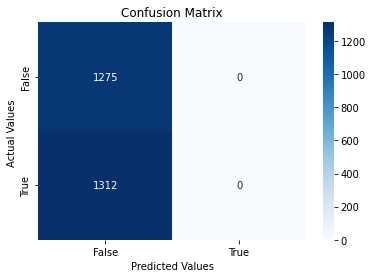

In [4]:
model = DummyClassifier(random_state=seed, strategy='most_frequent')
train_model("dummy classifier", model, acc_results)

##### KNeighborsClassifier

Classifier: KNeighborsClassifier

Report               precision    recall  f1-score   support

           0       0.83      0.68      0.74      1275
           1       0.73      0.86      0.79      1312

    accuracy                           0.77      2587
   macro avg       0.78      0.77      0.77      2587
weighted avg       0.78      0.77      0.77      2587


Accuracy: 0.7696173173560108


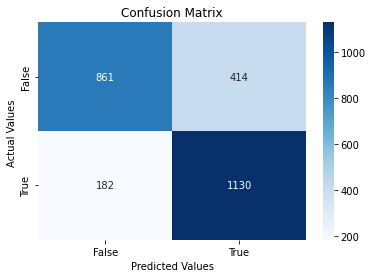

In [5]:
model = KNeighborsClassifier()
#n_neighbors=5
train_model( "KNeighborsClassifier", model, acc_results)

##### Logistic Regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Classifier: LogisticRegression

Report               precision    recall  f1-score   support

           0       0.79      0.75      0.77      1275
           1       0.77      0.81      0.79      1312

    accuracy                           0.78      2587
   macro avg       0.78      0.78      0.78      2587
weighted avg       0.78      0.78      0.78      2587


Accuracy: 0.7788944723618091


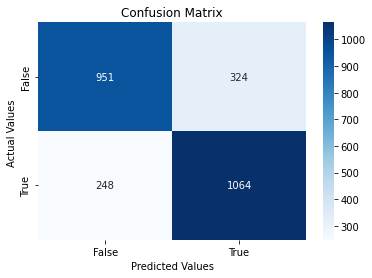

In [6]:
model = LogisticRegression(random_state=seed)
#max_iter=100, solver = lbfgs', penalty=l2
train_model("LogisticRegression", model, acc_results)

##### Support Vector Machines

Classifier: SupportVectorMachines

Report               precision    recall  f1-score   support

           0       0.81      0.74      0.78      1275
           1       0.77      0.84      0.80      1312

    accuracy                           0.79      2587
   macro avg       0.79      0.79      0.79      2587
weighted avg       0.79      0.79      0.79      2587


Accuracy: 0.7904909161190569


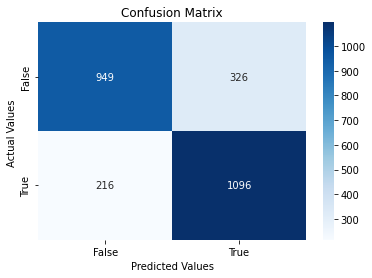

In [7]:
model = SVC(random_state=seed)
train_model("SupportVectorMachines", model,acc_results)

##### Decision Tree Classifier

Classifier: DecisionTreeClassifier

Report               precision    recall  f1-score   support

           0       0.95      0.82      0.88      1275
           1       0.85      0.95      0.90      1312

    accuracy                           0.89      2587
   macro avg       0.90      0.89      0.89      2587
weighted avg       0.90      0.89      0.89      2587


Accuracy: 0.8898337843061461


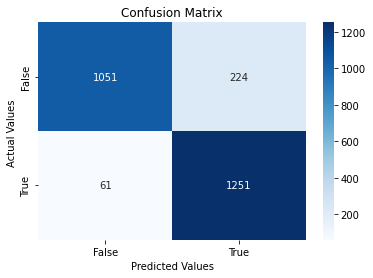

In [8]:
model = DecisionTreeClassifier(random_state=seed)
train_model("DecisionTreeClassifier", model,acc_results)

##### Random Forest Classifier

Classifier: RandomForestClassifier

Report               precision    recall  f1-score   support

           0       0.96      0.86      0.91      1275
           1       0.88      0.97      0.92      1312

    accuracy                           0.91      2587
   macro avg       0.92      0.91      0.91      2587
weighted avg       0.92      0.91      0.91      2587


Accuracy: 0.9141863161963665


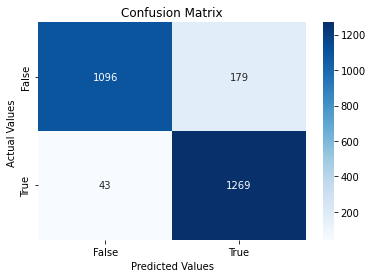

In [9]:
model = RandomForestClassifier(random_state=seed)
train_model("RandomForestClassifier", model,acc_results)

##### Gradient Boosting Classifier

Classifier: GradientBoostingClassifier

Report               precision    recall  f1-score   support

           0       0.80      0.75      0.78      1275
           1       0.77      0.82      0.80      1312

    accuracy                           0.79      2587
   macro avg       0.79      0.79      0.79      2587
weighted avg       0.79      0.79      0.79      2587


Accuracy: 0.7881716273676073


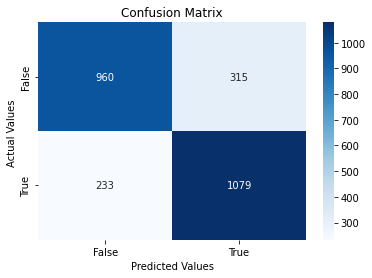

In [10]:
model = GradientBoostingClassifier(random_state=seed)
train_model("GradientBoostingClassifier", model, acc_results)

##### Accuracy Comparison

Random Forest outperforms all other models with default parameters.

In [11]:
acc_results

{'dummy classifier': 0.49284885968303055,
 'KNeighborsClassifier': 0.7696173173560108,
 'LogisticRegression': 0.7788944723618091,
 'SupportVectorMachines': 0.7904909161190569,
 'DecisionTreeClassifier': 0.8898337843061461,
 'RandomForestClassifier': 0.9141863161963665,
 'GradientBoostingClassifier': 0.7881716273676073}

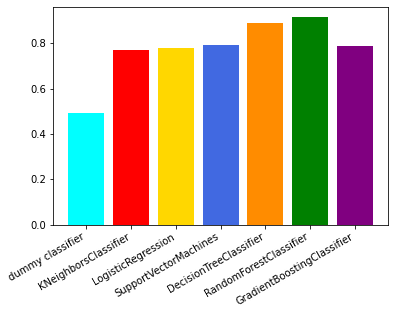

In [12]:
colors = ['aqua', 'red', 'gold', 'royalblue', 'darkorange', 'green', 'purple', 'steelblue', 'yellow', 'lime', 'magenta']
plt.bar(list(acc_results.keys()), acc_results.values(),  color=colors)
ax = plt.gca()
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

#### Hyper Tuned Parameters

##### KNeighborsClassifier

Classifier: Neighbour-2

Report               precision    recall  f1-score   support

           0       0.94      0.78      0.85      1275
           1       0.81      0.95      0.88      1312

    accuracy                           0.87      2587
   macro avg       0.88      0.87      0.87      2587
weighted avg       0.88      0.87      0.87      2587


Accuracy: 0.8666408967916506


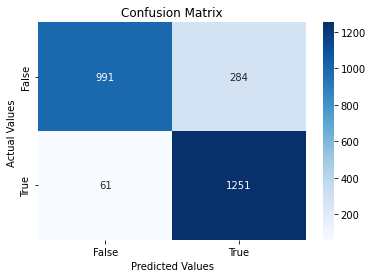

In [13]:
knn_results = {}
model = KNeighborsClassifier(n_neighbors=1)
train_model( "Neighbour-2", model,knn_results)

In [14]:
knn_results["Neighbour-5(default)"] = acc_results["KNeighborsClassifier"]

Classifier: Neighbour-7

Report               precision    recall  f1-score   support

           0       0.81      0.67      0.74      1275
           1       0.73      0.85      0.78      1312

    accuracy                           0.76      2587
   macro avg       0.77      0.76      0.76      2587
weighted avg       0.77      0.76      0.76      2587


Accuracy: 0.761886354851179


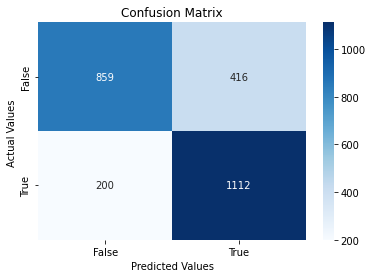

In [15]:
model = KNeighborsClassifier(n_neighbors=7)
train_model( "Neighbour-7", model, knn_results)

In [16]:
knn_results

{'Neighbour-2': 0.8666408967916506,
 'Neighbour-5(default)': 0.7696173173560108,
 'Neighbour-7': 0.761886354851179}

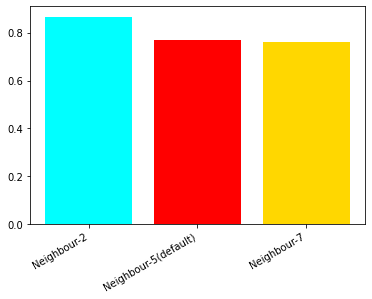

In [17]:
plt.bar(list(knn_results.keys()), knn_results.values(),  color=colors)
ax = plt.gca()
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

##### Logistic Regression

Classifier: Itr:120|SAGA|L1

Report               precision    recall  f1-score   support

           0       0.79      0.74      0.77      1275
           1       0.77      0.81      0.79      1312

    accuracy                           0.78      2587
   macro avg       0.78      0.78      0.78      2587
weighted avg       0.78      0.78      0.78      2587


Accuracy: 0.7781213761113258


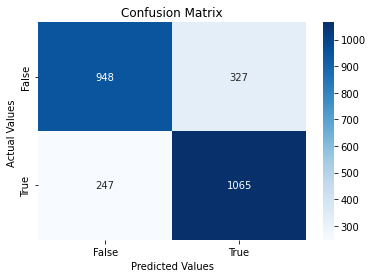

In [51]:
log_results = {}
model = LogisticRegression(random_state=seed, max_iter=120, solver='saga', penalty='l1')
train_model("Itr:120|SAGA|L1", model, log_results)

Classifier: Itr:120|SAGA|L2

Report               precision    recall  f1-score   support

           0       0.79      0.75      0.77      1275
           1       0.77      0.81      0.79      1312

    accuracy                           0.78      2587
   macro avg       0.78      0.78      0.78      2587
weighted avg       0.78      0.78      0.78      2587


Accuracy: 0.7788944723618091


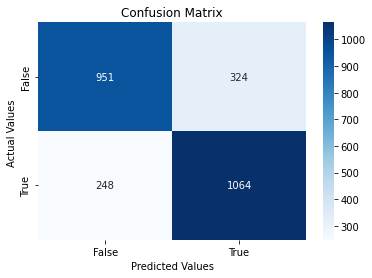

In [52]:
model = LogisticRegression(random_state=seed, max_iter=120, solver='saga', penalty='l2')
train_model("Itr:120|SAGA|L2", model, log_results)

In [53]:
log_results["Itr:100|lbfgs|L2(default)"] = acc_results["LogisticRegression"]

In [54]:
log_results

{'Itr:120|SAGA|L1': 0.7781213761113258,
 'Itr:120|SAGA|L2': 0.7788944723618091,
 'Itr:100|lbfgs|L2(default)': 0.7788944723618091}

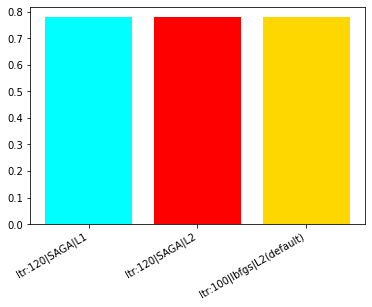

In [55]:
plt.bar(list(log_results.keys()), log_results.values(),  color=colors)
ax = plt.gca()
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

##### Support Vector Machines

Classifier: linear

Report               precision    recall  f1-score   support

           0       0.81      0.66      0.73      1275
           1       0.72      0.85      0.78      1312

    accuracy                           0.76      2587
   macro avg       0.77      0.76      0.75      2587
weighted avg       0.76      0.76      0.75      2587


Accuracy: 0.7568612292230382


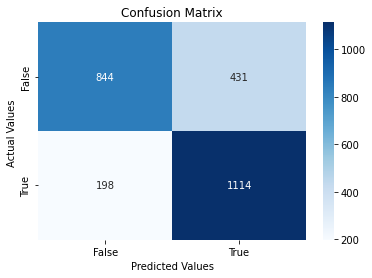

In [71]:
svm_result={}
model = SVC(random_state=seed, kernel='linear')
train_model("linear", model,svm_result)

Classifier: poly-3

Report               precision    recall  f1-score   support

           0       0.84      0.71      0.77      1275
           1       0.75      0.87      0.81      1312

    accuracy                           0.79      2587
   macro avg       0.80      0.79      0.79      2587
weighted avg       0.80      0.79      0.79      2587


Accuracy: 0.7889447236180904


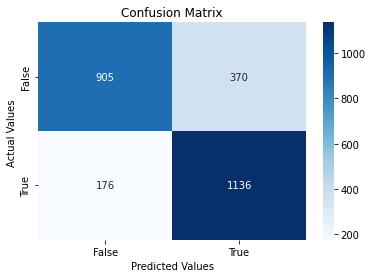

In [72]:
model = SVC(random_state=seed, kernel='poly', degree=3)
train_model("poly-3", model,svm_result)

Classifier: poly-5

Report               precision    recall  f1-score   support

           0       0.90      0.71      0.79      1275
           1       0.77      0.92      0.84      1312

    accuracy                           0.82      2587
   macro avg       0.83      0.82      0.82      2587
weighted avg       0.83      0.82      0.82      2587


Accuracy: 0.8175492848859683


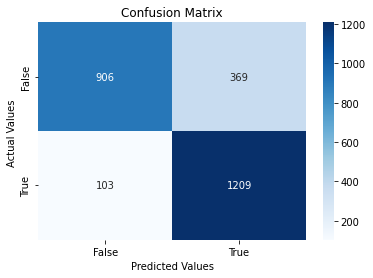

In [73]:
model = SVC(random_state=seed, kernel='poly', degree=5)
train_model("poly-5", model,svm_result)

Classifier: sigmoid

Report               precision    recall  f1-score   support

           0       0.64      0.66      0.65      1275
           1       0.66      0.64      0.65      1312

    accuracy                           0.65      2587
   macro avg       0.65      0.65      0.65      2587
weighted avg       0.65      0.65      0.65      2587


Accuracy: 0.6505604947816003


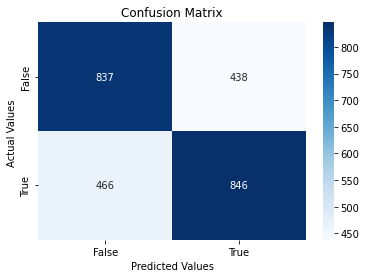

In [74]:
model = SVC(random_state=seed, kernel='sigmoid')
train_model("sigmoid", model,svm_result)

In [75]:
svm_result["rbf(default)"] = acc_results["SupportVectorMachines"]
svm_result

{'linear': 0.7568612292230382,
 'poly-3': 0.7889447236180904,
 'poly-5': 0.8175492848859683,
 'sigmoid': 0.6505604947816003,
 'rbf(default)': 0.7904909161190569}

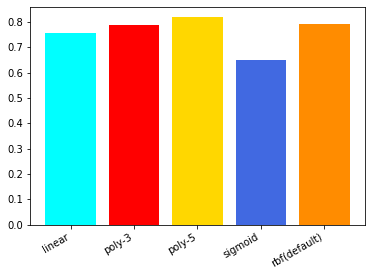

In [76]:
plt.bar(list(svm_result.keys()), svm_result.values(),  color=colors)
ax = plt.gca()
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

##### Decision Tree Classifier

Classifier: Depth:10|Random

Report               precision    recall  f1-score   support

           0       0.82      0.75      0.78      1275
           1       0.77      0.84      0.81      1312

    accuracy                           0.80      2587
   macro avg       0.80      0.80      0.80      2587
weighted avg       0.80      0.80      0.80      2587


Accuracy: 0.7959025898724391


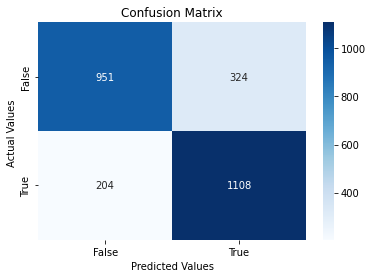

In [86]:
dt_result ={}
model = DecisionTreeClassifier(random_state=seed, max_depth = 10, splitter='random')
train_model("Depth:10|Random", model,dt_result)

Classifier: Depth:10|Best

Report               precision    recall  f1-score   support

           0       0.83      0.79      0.81      1275
           1       0.80      0.84      0.82      1312

    accuracy                           0.81      2587
   macro avg       0.81      0.81      0.81      2587
weighted avg       0.81      0.81      0.81      2587


Accuracy: 0.8125241592578276


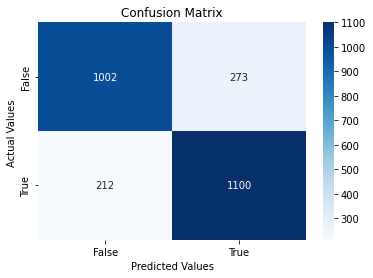

In [87]:
model = DecisionTreeClassifier(random_state=seed, max_depth = 10, splitter='best')
train_model("Depth:10|Best", model,dt_result)

In [88]:
dt_result["Depth:Full|Best(default)"] = acc_results["DecisionTreeClassifier"]
dt_result

{'Depth:10|Random': 0.7959025898724391,
 'Depth:10|Best': 0.8125241592578276,
 'Depth:Full|Best(default)': 0.8898337843061461}

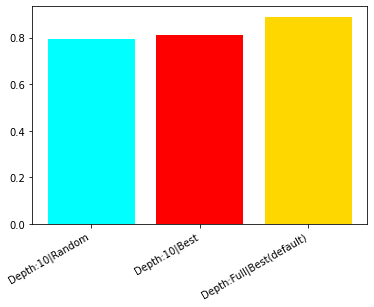

In [89]:
plt.bar(list(dt_result.keys()), dt_result.values(),  color=colors)
ax = plt.gca()
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

##### Random Forest Classifier

Classifier: Depth:10|Entropy

Report               precision    recall  f1-score   support

           0       0.89      0.79      0.84      1275
           1       0.82      0.90      0.86      1312

    accuracy                           0.85      2587
   macro avg       0.85      0.85      0.85      2587
weighted avg       0.85      0.85      0.85      2587


Accuracy: 0.8469269424043293


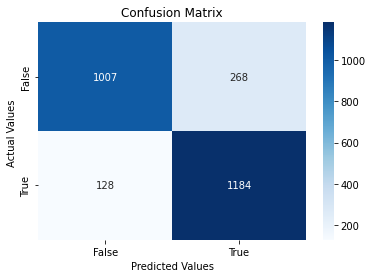

In [102]:
from sklearn.metrics.cluster import entropy
rf_res ={}
model = RandomForestClassifier(random_state=seed, max_depth=10, criterion="entropy")
train_model("Depth:10|Entropy", model,rf_res)

Classifier: Depth:10|Gini

Report               precision    recall  f1-score   support

           0       0.89      0.80      0.84      1275
           1       0.82      0.91      0.86      1312

    accuracy                           0.85      2587
   macro avg       0.86      0.85      0.85      2587
weighted avg       0.86      0.85      0.85      2587


Accuracy: 0.8515655199072284


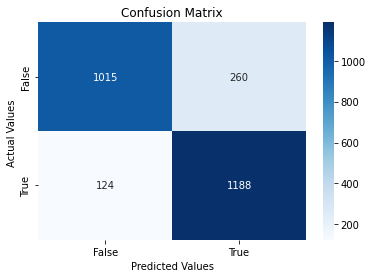

In [103]:
model = RandomForestClassifier(random_state=seed, max_depth=10, criterion='gini')
train_model("Depth:10|Gini", model,rf_res)

In [104]:
rf_res["Depth:Full|Gini(default)"] = acc_results["RandomForestClassifier"]
rf_res

{'Depth:10|Entropy': 0.8469269424043293,
 'Depth:10|Gini': 0.8515655199072284,
 'Depth:Full|Gini(default)': 0.9141863161963665}

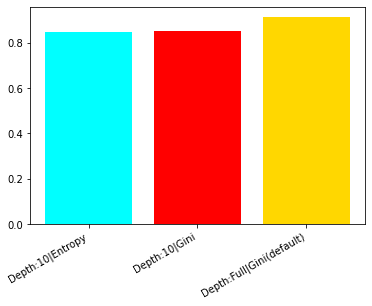

In [105]:
plt.bar(list(rf_res.keys()), rf_res.values(),  color=colors)
ax = plt.gca()
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

##### Gradient Boosting Classifier

Classifier: Exponential|0.1|100

Report               precision    recall  f1-score   support

           0       0.81      0.76      0.78      1275
           1       0.78      0.83      0.80      1312

    accuracy                           0.79      2587
   macro avg       0.79      0.79      0.79      2587
weighted avg       0.79      0.79      0.79      2587


Accuracy: 0.793196752995748


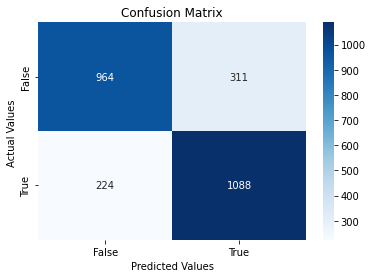

In [115]:
gb_res={}
model = GradientBoostingClassifier(random_state=seed,loss="exponential", learning_rate=0.1)
train_model("Exponential|0.1|100", model, gb_res)

Classifier: Exponential|0.1|1000

Report               precision    recall  f1-score   support

           0       0.88      0.80      0.84      1275
           1       0.82      0.89      0.85      1312

    accuracy                           0.85      2587
   macro avg       0.85      0.85      0.85      2587
weighted avg       0.85      0.85      0.85      2587


Accuracy: 0.8469269424043293


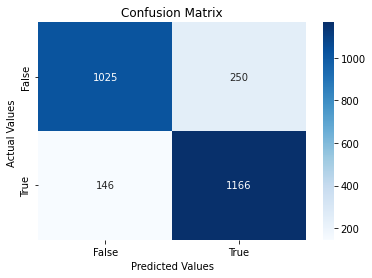

In [116]:
model = GradientBoostingClassifier(random_state=seed,loss="exponential", learning_rate=0.1, n_estimators=1000)
train_model("Exponential|0.1|1000", model, gb_res)

Classifier: Deviance|0.1|1000

Report               precision    recall  f1-score   support

           0       0.91      0.81      0.86      1275
           1       0.83      0.92      0.87      1312

    accuracy                           0.87      2587
   macro avg       0.87      0.86      0.86      2587
weighted avg       0.87      0.87      0.86      2587


Accuracy: 0.8650947042906841


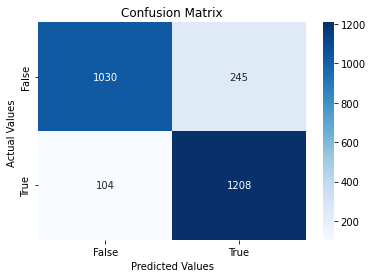

In [117]:
model = GradientBoostingClassifier(random_state=seed,loss="deviance", learning_rate=0.1, n_estimators=1000)
train_model("Deviance|0.1|1000", model, gb_res)

In [118]:
gb_res["LogLoss|0.1|100(default)"] = acc_results["GradientBoostingClassifier"]
gb_res

{'Exponential|0.1|100': 0.793196752995748,
 'Exponential|0.1|1000': 0.8469269424043293,
 'Deviance|0.1|1000': 0.8650947042906841,
 'LogLoss|0.1|100(default)': 0.7881716273676073}

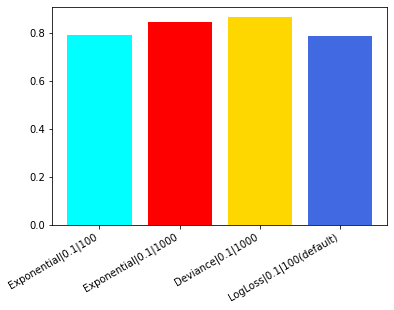

In [119]:
plt.bar(list(gb_res.keys()), gb_res.values(),  color=colors)
ax = plt.gca()
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()